## Object Detection with YOLO v3 - To Use

#### Utils
---

In [2]:
# Import các thư viện
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Thêm matplotlib để hiển thị ảnh

# Hàm chuyển đổi tọa độ YOLO
def yolo_box_to_points(box):
    x1, y1, w, h = box
    x2 = x1 + w
    y2 = y1 + h
    return x1, y1, x2, y2

# Hàm vẽ hộp giới hạn và nhãn
def draw_bounding_box_with_label(image, x1, y1, x2, y2, label, color, thickness=2):
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color=color, thickness=thickness)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    label_size, baseline = cv2.getTextSize(label, font, font_scale, thickness=thickness)
    cv2.rectangle(
        image,
        (int(x1 - thickness / 2), int(y1 - label_size[1])),
        (int(x1 + label_size[0]), int(y1)),
        color,
        cv2.FILLED,
    )
    cv2.putText(image, label, (int(x1), int(y1)), font, font_scale, color=(0, 0, 0))
    return image

#### Object Detection 
---

In [7]:
# Đường dẫn tới tệp trên Kaggle
class_names_path = "/kaggle/input/models/coco.names"  # Cập nhật đường dẫn
weights_path = "/kaggle/input/models/yolov4.weights"  # Cập nhật đường dẫn
config_path = "/kaggle/input/models/yolov4.cfg"      # Cập nhật đường dẫn
image_path = "/kaggle/input/imagess/doithuong3"  # Cập nhật đường dẫn ảnh

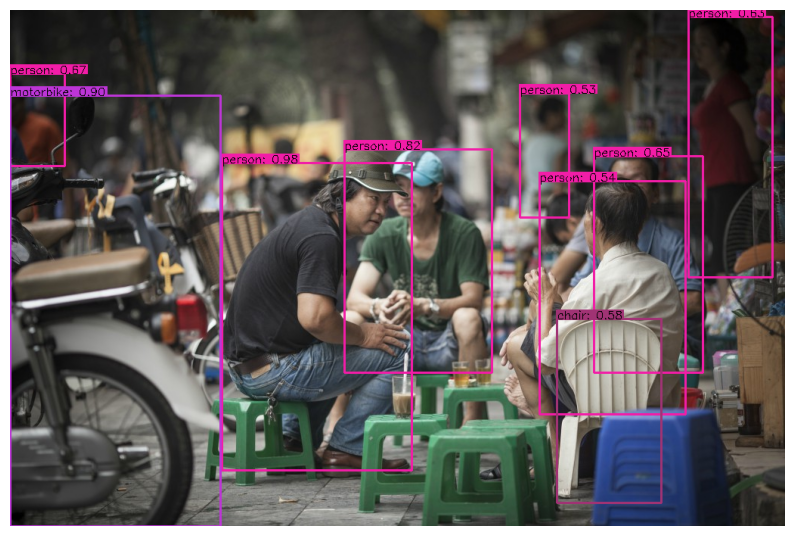

True

In [8]:


# Tải danh sách lớp
with open(class_names_path, "r") as f:
    CLASSES = f.read().splitlines()

# Tạo màu ngẫu nhiên
np.random.seed(1000)
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# Ngưỡng
CONFIDENCE_THRESHOLD = 0.5
NMS_THRESHOLD = 0.5

# Tải ảnh
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Không thể tải ảnh. Kiểm tra đường dẫn:", image_path)
height, width = image.shape[:2]

# Tải mô hình YOLO
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

# Chạy mô hình
model = cv2.dnn_DetectionModel(net)
model.setInputParams(scale=1 / 255, size=(416, 416), swapRB=True)
class_ids, scores, boxes = model.detect(
    image, confThreshold=CONFIDENCE_THRESHOLD, nmsThreshold=NMS_THRESHOLD
)

# Vẽ hộp giới hạn
for (class_id, score, box) in zip(class_ids, scores, boxes):
    label = f"{CLASSES[class_id]}: {score:.2f}"
    color = COLORS[class_id]
    x1, y1, x2, y2 = yolo_box_to_points(box)
    image = draw_bounding_box_with_label(image, x1, y1, x2, y2, label, color)

# Chuyển đổi BGR sang RGB để hiển thị bằng matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh bằng matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Ẩn trục tọa độ
plt.show()

# Lưu ảnh kết quả (tùy chọn)
cv2.imwrite('/kaggle/working/output.jpg', image)